In [1]:
# Import libraries
from joblib import dump
import scikitplot as skplt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
df_group5 = pd.read_csv('../cleaned_data_KSI.csv')
df_group5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17665 entries, 0 to 17664
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LATITUDE       17665 non-null  float64
 1   LONGITUDE      17665 non-null  float64
 2   ACCLOC         12585 non-null  object 
 3   VISIBILITY     17665 non-null  object 
 4   LIGHT          17665 non-null  object 
 5   RDSFCOND       17665 non-null  object 
 6   ACCLASS        17665 non-null  object 
 7   IMPACTYPE      17665 non-null  object 
 8   INVTYPE        17665 non-null  object 
 9   INVAGE         17665 non-null  object 
 10  INJURY         9340 non-null   object 
 11  DRIVCOND       9007 non-null   object 
 12  PEDESTRIAN     17665 non-null  int64  
 13  CYCLIST        17665 non-null  int64  
 14  AUTOMOBILE     17665 non-null  int64  
 15  MOTORCYCLE     17665 non-null  int64  
 16  TRUCK          17665 non-null  int64  
 17  TRSN_CITY_VEH  17665 non-null  int64  
 18  EMERG_

In [3]:
print(df_group5.describe().T)

                 count       mean       std        min        25%        50%  \
LATITUDE       17665.0  43.711492  0.056172  43.589678  43.662445  43.704245   
LONGITUDE      17665.0 -79.395495  0.104719 -79.638390 -79.469287 -79.396632   
PEDESTRIAN     17665.0   0.410643  0.491964   0.000000   0.000000   0.000000   
CYCLIST        17665.0   0.107614  0.309901   0.000000   0.000000   0.000000   
AUTOMOBILE     17665.0   0.909086  0.287495   0.000000   1.000000   1.000000   
MOTORCYCLE     17665.0   0.086499  0.281107   0.000000   0.000000   0.000000   
TRUCK          17665.0   0.061308  0.239901   0.000000   0.000000   0.000000   
TRSN_CITY_VEH  17665.0   0.062157  0.241447   0.000000   0.000000   0.000000   
EMERG_VEH      17665.0   0.002434  0.049279   0.000000   0.000000   0.000000   
SPEEDING       17665.0   0.138070  0.344983   0.000000   0.000000   0.000000   
AG_DRIV        17665.0   0.521483  0.499552   0.000000   0.000000   1.000000   
REDLIGHT       17665.0   0.086046  0.280

In [4]:
x_group5 = df_group5.drop(columns=['ACCLASS'], axis=1)
y_group5 = df_group5['ACCLASS']

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(x_group5, y_group5):
    x_train, x_test = x_group5.loc[train_index], x_group5.loc[test_index]
    y_train, y_test = y_group5.loc[train_index], y_group5.loc[test_index]

numerical_cols = x_train.select_dtypes(include=np.number).columns
cat_cols = x_train.select_dtypes(include='object').columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, cat_cols)
])

full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
])


x_train_prepared = full_pipeline.fit_transform(x_train)

x_train_prepared, y_train = SMOTE(
    random_state=42).fit_resample(x_train_prepared, y_train)
x_test_transformed = full_pipeline.transform(x_test)

In [5]:
neural_net = MLPClassifier(random_state=42)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (100, 50), (100, 50, 25)],
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 300, 400, 500],
    'learning_rate': ['constant', 'adaptive']
}

neu_grid = RandomizedSearchCV(
    neural_net, param_grid, cv=10, n_jobs=-1, random_state=42)
neu_grid.fit(x_train_prepared, y_train)

neural_best_params = neu_grid.best_params_
neural_best_score = neu_grid.best_score_
print("Best Parameters:", neural_best_params)
print("Best Estimator:", neu_grid.best_estimator_)
print("Best Score:", neural_best_score)

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multi

Best Parameters: {'solver': 'adam', 'max_iter': 500, 'learning_rate': 'constant', 'hidden_layer_sizes': (150,), 'alpha': 0.01, 'activation': 'relu'}
Best Score: 0.9540924602833645


In [6]:
neural_best_model = neu_grid.best_estimator_
y_pred = neural_best_model.predict(x_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

Accuracy score: 0.8958490566037736


[[2.33341358e-04 9.99766659e-01]
 [8.11380102e-01 1.88619898e-01]
 [3.26589029e-03 9.96734110e-01]
 ...
 [8.77103699e-01 1.22896301e-01]
 [3.45884898e-03 9.96541151e-01]
 [2.40284123e-03 9.97597159e-01]]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


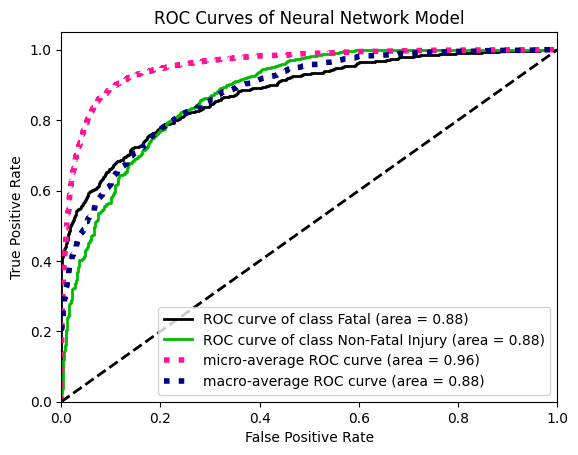

In [7]:
y_probas = neural_best_model.predict_proba(x_test_transformed)
print(y_probas)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.title('ROC Curves of Neural Network Model')
plt.show()

In [8]:
report = classification_report(y_test, y_pred)
print("Classification report of Neural Network Model:")
print(report)

Classification report of Neural Network Model:
                  precision    recall  f1-score   support

           Fatal       0.63      0.59      0.61       735
Non-Fatal Injury       0.94      0.94      0.94      4565

        accuracy                           0.90      5300
       macro avg       0.78      0.77      0.78      5300
    weighted avg       0.89      0.90      0.89      5300



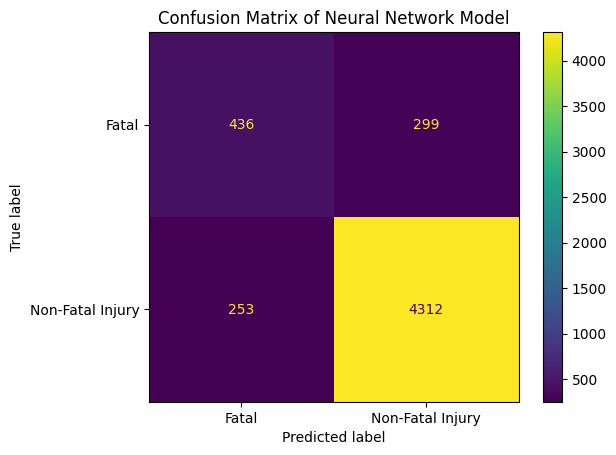

In [9]:
cfs_matrix = confusion_matrix(
    y_test, y_pred, labels=neural_best_model.classes_)
display = ConfusionMatrixDisplay(
    cfs_matrix, display_labels=neural_best_model.classes_)
display.plot()
plt.title("Confusion Matrix of Neural Network Model")
plt.show()

In [10]:
dump(neural_best_model, '../deployment/nn_model.pkl')

['../deployment/nn_model.pkl']